In [2]:
from typing import List

In [3]:
# %load ../common_imports.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from jlam.py_sql import PySql
import jlam.conn_constants as cnst
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core import debugger as dbg

%load_ext autoreload
%autoreload 2

# usage pandas_profiling.ProfileReport(df)
#import pandas_profiling ;

#bidata = PySql(cnst.SVR_BIEDW,cnst.DB_BI_DATA)
#biops = PySql(cnst.SVR_BIEDW,cnst.DB_BI_OPERATIONAL)
#sfdc = PySql(cnst.SVR_BIODS,cnst.DB_SFDC_DATA)

In [4]:
max_num = 10 # max # of Friends
num_friends = np.random.random_integers(1,max_num,100)

/Users/i846240/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  


In [5]:
# num_friends

In [6]:
from collections import Counter


In [7]:
friend_counts = Counter(num_friends)
xs = range(len(num_friends)+1)
ys = [friend_counts[x] for x in xs] # height is just # of friends

In [8]:
# list(friend_counts.elements())
max_height=friend_counts.most_common()[0][1]

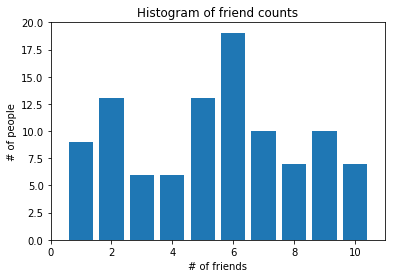

In [9]:
plt.bar(xs, ys)
plt.axis([0, max_num+1, 0, max_height+1])
plt.title("Histogram of friend counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [10]:
len(num_friends)

100

In [11]:
min(num_friends),max(num_friends)

(1, 10)

# Central Tendencies

In [12]:
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

# lst = [1,2,3,4,5,6]
print(np.mean(num_friends))
assert mean(num_friends)==np.mean(num_friends)

5.42


In [13]:
def _median_odd(xs: List[float]) -> float:
    return sorted(xs)[len(xs) // 2]

In [14]:
def _median_even(xs: List[float]) -> float:
    ''' returns average of the middle two points'''
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

In [15]:
def median(xs: List[float]) -> float:
#     if len(xs) % 2 == 0:
#         return _median_even(xs)
#     else:
#         return _median_odd(xs)
    return _median_even(xs) if len(xs) % 2 == 0 else _median_odd(xs)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2



In [16]:
print(median(num_friends))

6.0


In [17]:
def quantile(xs: List[float], p: float) -> float:
    '''Returns the pth-percentile value in x'''
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

In [18]:
lst = np.arange(1,101)
assert quantile(lst,.25) == 26
assert quantile(lst,.50) == 51
assert quantile(lst,.75) == 76

In [19]:
for i in [.25, .50, .75]:
    print(quantile(num_friends,i))

3
6
7


In [20]:
def mode(xs: List[float]) -> List[float]:
    ''' returns the most common values
        returns a list, since there might be more than one mode
    '''
    counts = Counter(xs) # num_friends : occurances
    max_count = max(counts.values()) # most number of friends
    # loop through to see which ones has the max count
    return [x_i  for x_i, count in counts.items()
               if count==max_count]

In [21]:
lst = [1,2,2,3,3,4,5]
assert mode(lst)==[2,3]

##### https://www.mathsisfun.com/data/standard-deviation.html

**Dispersion measures how spread out our data is.**
- Range : the difference between the smallest and the largest elements; it doesn't depend on the whole dataset.
- Variance : The average of the squared differences from the Mean.



In [22]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

print(max(num_friends) - min(num_friends))
# assert data_range(num_friends) == 9

9


In [23]:
def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar  for x in xs]  #stand deviation

In [24]:
import math_util as mu

def variance(xs: List[float]) -> float:
    assert len(xs)>= 2 # requires at least 2 elements
    
    n = len(xs)
    deviations = de_mean(xs)
    return mu.sum_of_squares(deviations) / (n - 1)

In [25]:
num_friends

array([ 2,  7,  5,  5,  7,  1,  2,  6,  3,  9,  2,  4,  1,  3,  5,  1,  5,
        1,  8,  1,  5,  9,  5,  6,  6,  8,  9,  2, 10, 10,  6,  7,  5,  5,
        8,  1,  2,  9,  2,  4,  3,  6,  6,  2,  8,  9,  9,  9,  5,  4,  5,
        6,  2,  7,  1,  4,  2, 10,  6,  9,  5,  8,  6,  4,  7, 10,  2,  8,
        2,  6, 10,  9,  6,  6,  6, 10,  7,  6,  3,  6,  1,  2,  3,  5, 10,
        6,  3,  7,  7,  6,  4,  1,  7,  6,  7,  9,  8,  2,  6,  5])

In [26]:
# mean(num_friends),de_mean(num_friends)

In [27]:
lst = [1,2,9]
np.sqrt(variance(lst))

4.358898943540674

In [28]:
mean(lst)

4.0

In [29]:
de_mean(lst)

[-3.0, -2.0, 5.0]

In [30]:
import math

In [31]:
def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

In [32]:
# assert np.std(num_friends) == standard_deviation(num_friends)
round(np.std(num_friends),1), round(standard_deviation(num_friends),1)

(2.7, 2.7)

In [33]:
def interquartile_range(xs: List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

In [34]:
interquartile_range(num_friends)

4

### Correlation

- variance measures how a single variable deviates from its mean
- **covariance measures how two variables vary in tandem with their means**
- **correlation - divides out the standard deviations of both variables**

In [35]:
# !pip uninstall scratch

In [40]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have the same length"
    
    return np.dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

In [52]:
f = [4,5,6,7,8]
m = [10,20,30,40,50]
m.reverse()

In [53]:
covariance(f,m)

-25.0

In [60]:
np.dot([2,3],[2,2])

10

In [61]:
def correlation(xs: List[float], ys: List[float]) -> float:
    '''Measures how much xs and ys vary in tandem about their means'''
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0